In [1]:
#Coursework
#Here we will import things such as my_utils and torch
import my_utils as mu
import torch
import torch.nn as nn
import time 
# Just used to check if the code is running on the GPU or not
torch.cuda.is_available()
mu.try_gpu()

device(type='cuda', index=0)

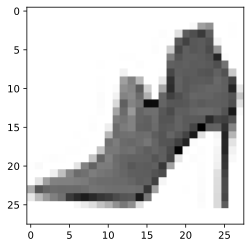

In [10]:
import matplotlib.pyplot as plt
#We will set the batch_size here to be 64
batch_size = 64
#This is where we load the data from the mnist dataset
train_dataset, test_dataset =mu.load_data_fashion_mnist(batch_size)
#This is to see what one of the images look like from the dataset
for data in train_dataset:  
    plt.imshow(data[0][0].view(28,28),cmap='Greys') #plot the image
    plt.show()
    break

In [11]:
class Net(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.relu = nn.ReLU(inplace =True) 
        self.Linear_1 = nn.Linear( 196 ,784 )
        self.Linear_2_hidden = nn.Linear(784, 200)
        self.Linear_3_hidden = nn.Linear(4 , 64)
        self.Linear_4_hidden = nn.Linear(64, 10)        
    def forward(self, x):
        x = nn.functional.unfold(x,(14,14),stride =14)

        #This is the first mlp where we do O1 =g(xTw1)W2
        #First we transpose x so that it is in the correct shape for the linear layer
        x = torch.transpose(x , 1 , 2)
        #Then we do the linear layer
        x = self.Linear_1(x)
        #Then we do the relu
        x = self.relu(x)
        #Then we do the linear layer
        x = self.Linear_2_hidden(x)
        # dropout layer
        #torch.nn.Dropout(p = 0.1 ,  inplace = True)
        #step 2
        #This is the second mlp where we do O2 =g(01w3)W4
        x = torch.transpose(x ,1 ,2)
        
        #second mlp
        #Then we do the linear layer
        x = self.Linear_3_hidden(x)
        #Then we do the relu
        x = self.relu(x)
        #Then we do the linear layer
        x = self.Linear_4_hidden(x)
        #Then we do the softmax for output
        output = x
        return output.mean(axis=1)
#This is the number of inputs and outputs for the network 
num_inputs, num_outputs = 784, 10
# Initialize the network without cuda 
net = Net(num_inputs, num_outputs)
# Initialize the network for cuda if it is available
netWcuda= Net(num_inputs=num_inputs, num_outputs=num_outputs)

In [12]:
# Model instantiation and initialisation 
def init_weights(m):
    if type(m) == nn.Linear: # by checking type we can init different layers in different ways
        # Initialize the weights of the linear layer
        torch.nn.init.normal_(m.weight, std=0.01)
        # Initialize the bias of the linear layer
        torch.nn.init.zeros_(m.bias)

Loss and optimiser  

In [14]:
# create your loss here. Use Cross Entropy loss:
loss = nn.CrossEntropyLoss()
# create your optimizer here. Use SGD with weight decay:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5,weight_decay=0.09)

loss 0.406, train acc 0.855, test acc 0.841
19489.6 examples/sec on cuda:0
Time taken: 130.53992549999384


0.8412

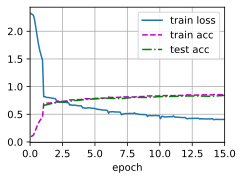

In [16]:
# Train the network
# This is the number of epochs we will train the network for
num_epochs = 15
initialtime = time.perf_counter() #This is to keep track of the time it takes to train the network
mu.train_ch6(netWcuda, train_dataset, test_dataset,num_epochs , 0.1) #This is to train the network
posttime = time.perf_counter() 
print('Time taken: {}'.format(posttime - initialtime)) #This is to print the time it took to train the network
mu.evaluate_accuracy_gpu(netWcuda, test_dataset) # This is to evaluate the accuracy of the network

In [ ]:
# test with high learning rate
num_epochs = 40  
initialtime = time.perf_counter()
mu.train_ch6(netWcuda, train_dataset, test_dataset,num_epochs , 0.9)
posttime = time.perf_counter()
print(f'Time taken: {posttime - initialtime}'.format())
mu.evaluate_accuracy_gpu(netWcuda, test_dataset)

In [ ]:
#CPU version
num_epochs = 15
initialtime = time.perf_counter()
mu.train_ch3(net, train_dataset, test_dataset, loss ,num_epochs , optimizer)
posttime = time.perf_counter()
print('Time taken: {}'.format(posttime - initialtime))
mu.evaluate_accuracy(net, test_dataset)